In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,813af424-a584-4417-b7ee-0d4c705e83c9,0,0.334470,1.199280e-06,13.786700,0.302347,0.539346,10.447900,74.5893,neutral
1,813af424-a584-4417-b7ee-0d4c705e83c9,1,0.840043,9.234260e-05,2.242650,0.560995,0.417769,0.022157,95.9163,neutral
2,813af424-a584-4417-b7ee-0d4c705e83c9,2,2.290200,1.809870e-04,5.731700,0.132673,3.990380,0.011224,87.8436,neutral
3,813af424-a584-4417-b7ee-0d4c705e83c9,3,0.417658,7.776570e-07,0.063667,0.017022,0.107120,0.000130,99.3944,neutral
4,813af424-a584-4417-b7ee-0d4c705e83c9,4,0.219031,5.969380e-06,2.211050,0.103567,0.352093,0.035190,97.0791,neutral


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          93 non-null     object 
 1   image_seq         93 non-null     int64  
 2   angry             93 non-null     float64
 3   disgust           93 non-null     float64
 4   fear              93 non-null     float64
 5   happy             93 non-null     float64
 6   sad               93 non-null     float64
 7   surprise          93 non-null     float64
 8   neutral           93 non-null     float64
 9   dominant_emotion  93 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.4+ KB


In [4]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust       fear      happy        sad  \
count  93.000000  93.000000  9.300000e+01  93.000000  93.000000  93.000000   
mean   46.000000   8.115339  1.119884e-02  11.939264   2.120367   1.955231   
std    26.990739  13.794058  4.575753e-02  18.479163   8.388213   3.985409   
min     0.000000   0.025846  8.551100e-11   0.004501   0.002123   0.007992   
25%    23.000000   0.334470  2.932250e-07   0.296672   0.052007   0.205621   
50%    46.000000   1.440180  3.979970e-05   1.958190   0.302347   0.511124   
75%    69.000000   8.874540  1.594090e-03  16.662700   0.776652   1.603200   
max    92.000000  59.193800  3.162430e-01  87.632500  71.745700  28.907800   

        surprise    neutral  
count  93.000000  93.000000  
mean    1.901795  73.956810  
std     6.809604  32.030199  
min     0.000016   0.791256  
25%     0.003340  43.812200  
50%     0.040144  92.759500  
75%     0.550705  98.513200  
max    58.758100  99.888500  


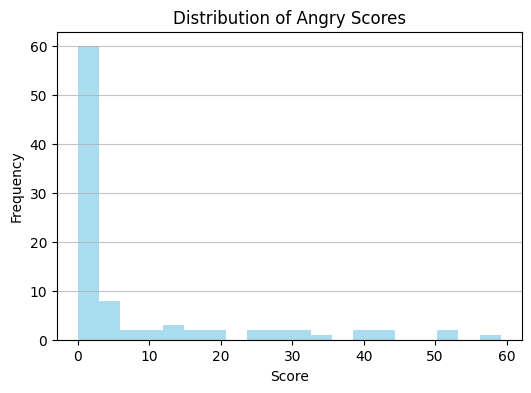

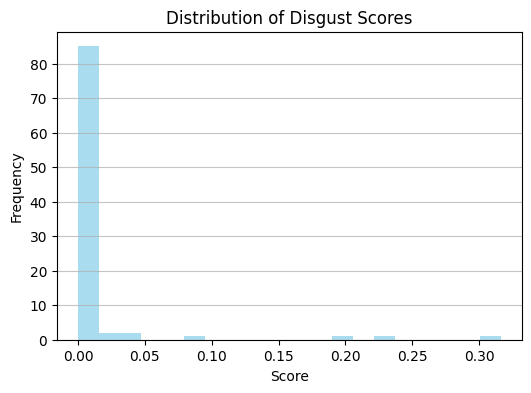

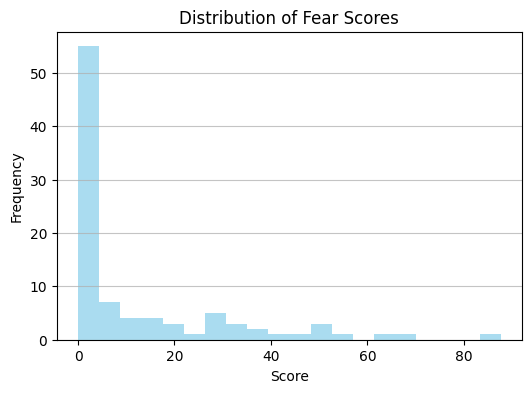

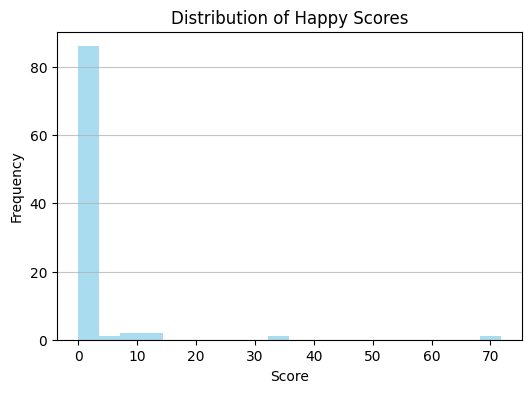

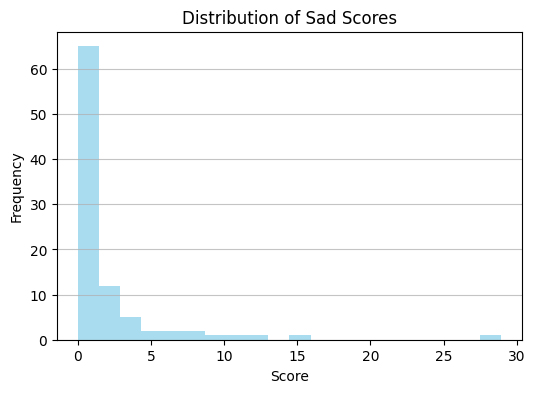

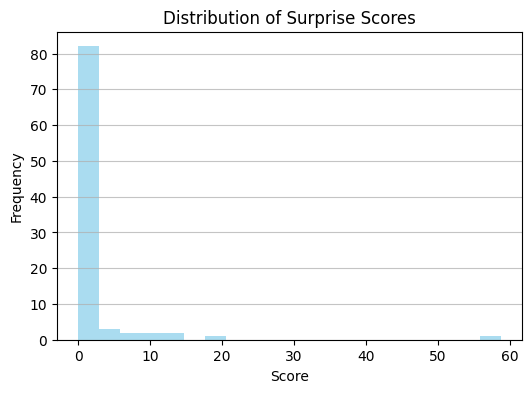

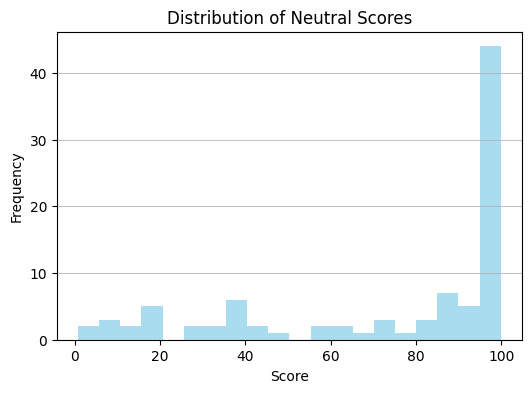

In [6]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

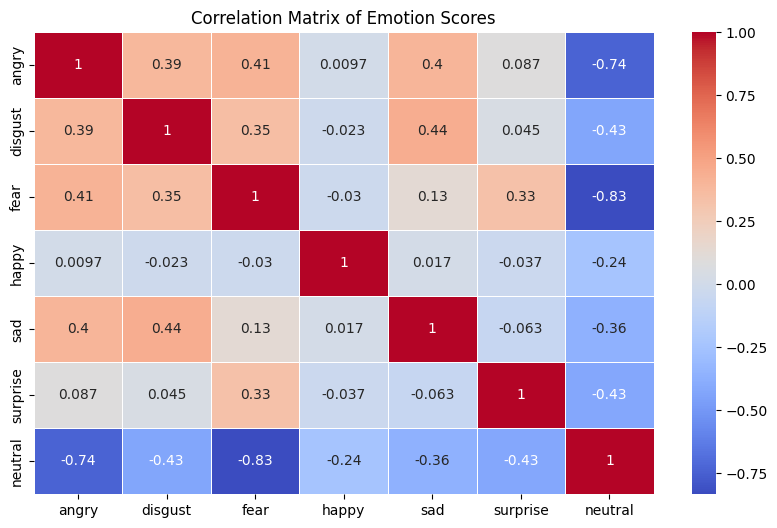

In [6]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

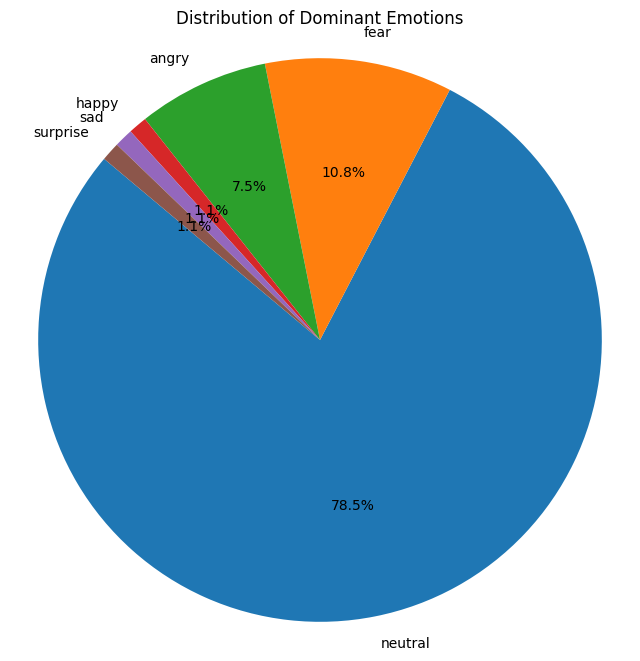

In [7]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [8]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,813af424-a584-4417-b7ee-0d4c705e83c9,1,1,0,1.7394
1,813af424-a584-4417-b7ee-0d4c705e83c9,2,1,0,-1.0581
2,813af424-a584-4417-b7ee-0d4c705e83c9,3,1,0,-0.3826
3,813af424-a584-4417-b7ee-0d4c705e83c9,4,1,0,6.6005
4,813af424-a584-4417-b7ee-0d4c705e83c9,5,1,0,3.7838


In [9]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

            gaze      blink  eye_offset
count  93.000000  93.000000   93.000000
mean    0.946237   0.032258    6.564640
std     0.226773   0.177642   11.373373
min     0.000000   0.000000  -15.050100
25%     1.000000   0.000000    0.442100
50%     1.000000   0.000000    3.917300
75%     1.000000   0.000000    9.299900
max     1.000000   1.000000   69.983200


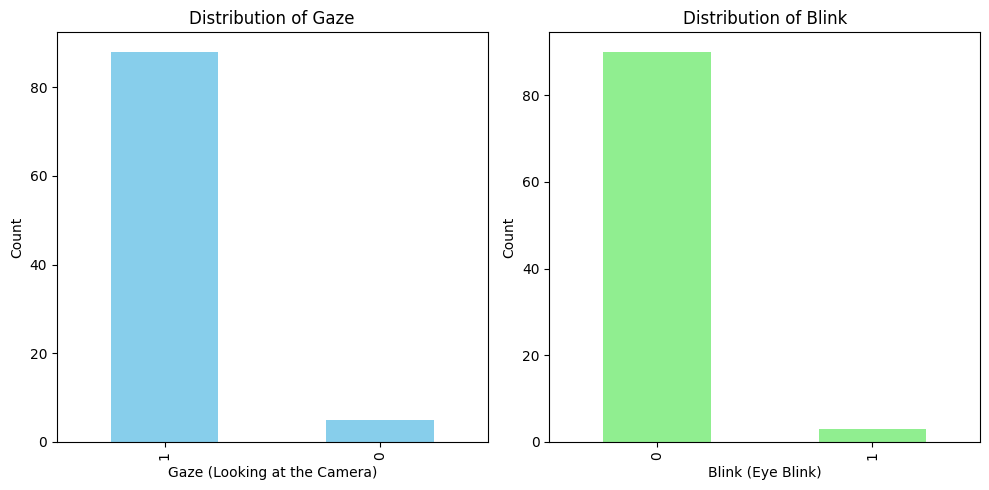

In [10]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

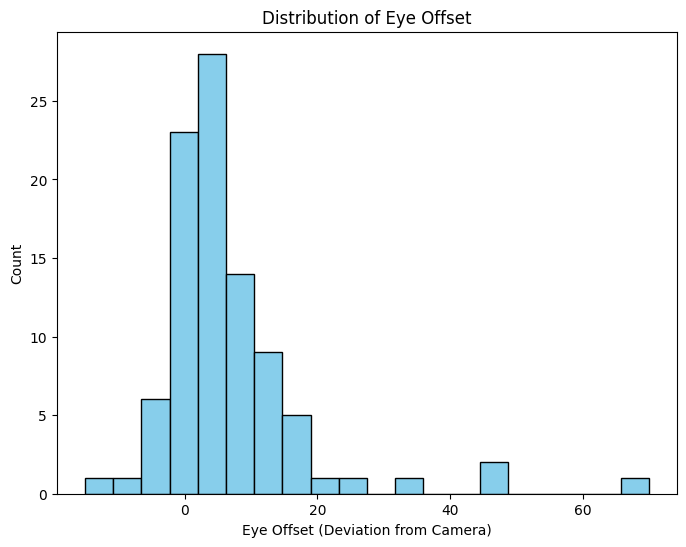

In [11]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [12]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,813af424-a584-4417-b7ee-0d4c705e83c9,0,1c0c686b-3aae-4ac6-8625-3e86a7a0892f,1.0,2023-09-17 07:52:59,0.0
1,813af424-a584-4417-b7ee-0d4c705e83c9,1,1c0c686b-3aae-4ac6-8625-3e86a7a0892f,2.0,2023-09-17 07:52:59,0.0
2,813af424-a584-4417-b7ee-0d4c705e83c9,2,1c0c686b-3aae-4ac6-8625-3e86a7a0892f,3.0,2023-09-17 07:52:59,0.0
3,813af424-a584-4417-b7ee-0d4c705e83c9,3,1c0c686b-3aae-4ac6-8625-3e86a7a0892f,4.0,2023-09-17 07:52:59,0.0
4,813af424-a584-4417-b7ee-0d4c705e83c9,4,1c0c686b-3aae-4ac6-8625-3e86a7a0892f,5.0,2023-09-17 07:52:59,0.0


In [13]:
metadata_df.shape

(93, 6)

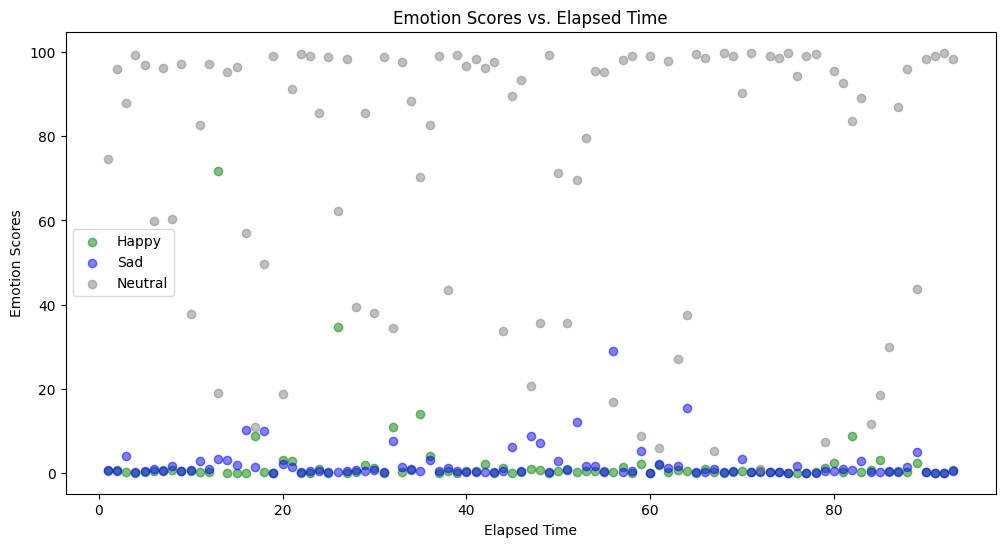

In [14]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [15]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

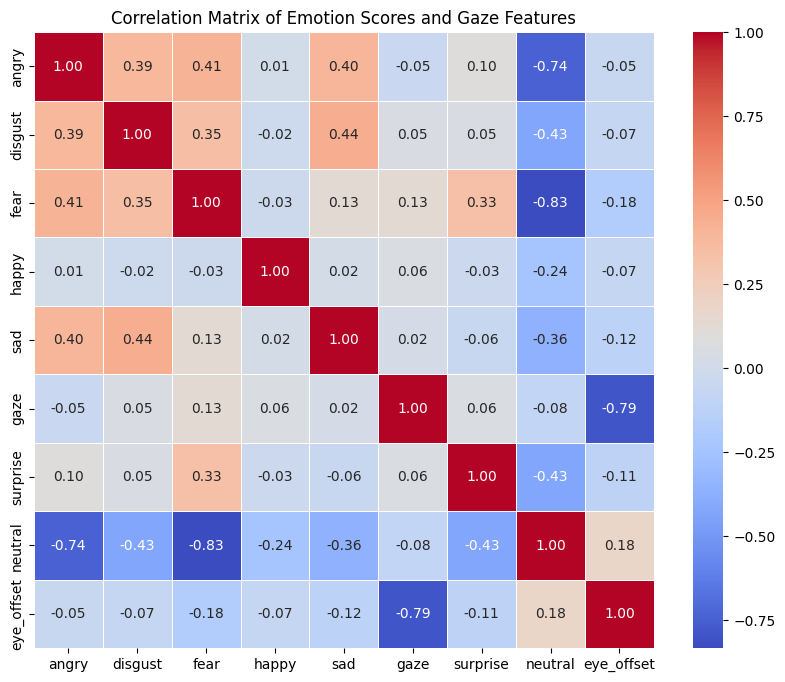

In [16]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad','gaze', 'surprise', 'neutral', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [17]:
transcript_scores_df = pd.read_csv("8.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,6.88,"Hi, hope you're doing well. I'm Srivats Biyan...","[50364, 2421, 11, 1454, 291, 434, 884, 731, 13...",0.0,-0.350669,1.59364,0.611599,0.749869,0.073202,0.176930,0.613489,0.810735,0.677798,0.614666,2.470930
1,1,0,6.88,12.12,"Now before joining IIM Co-Ecode, what all hav...","[50708, 823, 949, 5549, 286, 6324, 3066, 12, 3...",0.0,-0.350669,1.59364,0.611599,0.250922,0.367668,0.381410,0.156975,0.982899,0.177705,0.087839,3.053435
2,2,0,12.12,17.84,I've also cleared CFA level 1. I interned wit...,"[50970, 286, 600, 611, 19725, 383, 19684, 1496...",0.0,-0.350669,1.59364,0.611599,0.795946,0.072045,0.132009,0.859654,0.526984,0.681132,0.410668,2.972028
3,3,0,17.84,23.60,article shift basically from there and I work...,"[51256, 7222, 5513, 1936, 490, 456, 293, 286, ...",0.0,-0.350669,1.59364,0.611599,0.369227,0.342267,0.288506,0.266564,0.729600,0.310952,0.115520,2.604167
4,4,0,23.60,29.00,"CA, I worked with ITC limited in the internal...","[51544, 22852, 11, 286, 2732, 365, 6783, 34, 5...",0.0,-0.350669,1.59364,0.611599,0.365605,0.403855,0.230541,0.565594,0.854084,0.415774,0.146437,2.962963


In [18]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  16.000000  16.000000  16.000000  16.000000  16.000000  16.000000   
mean    0.605402   0.192292   0.202306   0.555011   0.507622   0.352011   
std     0.235258   0.134117   0.125727   0.265491   0.276555   0.209769   
min     0.215706   0.031729   0.023067   0.067931   0.071692   0.035912   
25%     0.386803   0.079141   0.108173   0.349258   0.278676   0.208833   
50%     0.630619   0.154461   0.188653   0.571599   0.492247   0.287216   
75%     0.808925   0.300131   0.276839   0.818429   0.736031   0.475020   
max     0.902281   0.406963   0.498208   0.925557   0.982899   0.744804   

       enthusiastic  speech_speed  
count     16.000000     16.000000  
mean       0.437399      2.902953  
std        0.319998      0.638401  
min        0.067640      1.796407  
25%        0.138707      2.461608  
50%        0.389998      2.816024  
75%        0.654394      3.153897  
max        0.971159      4.054054  


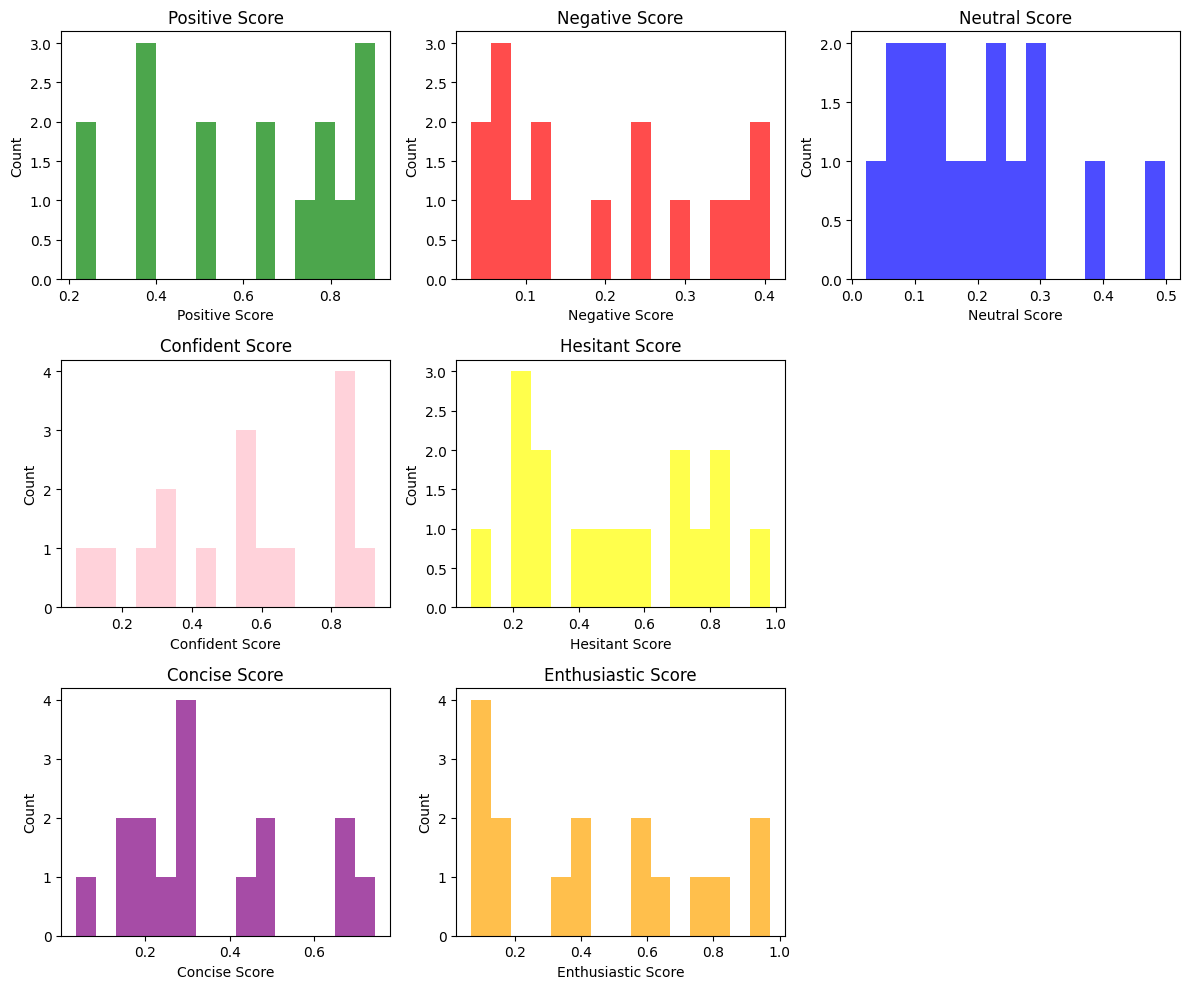

In [19]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

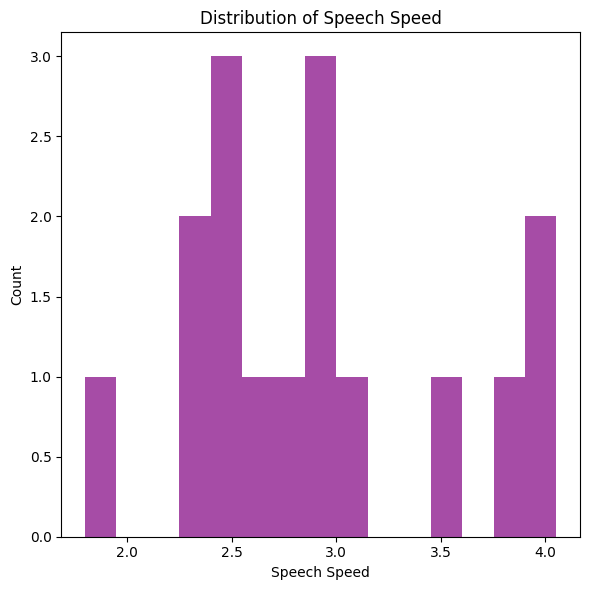

In [20]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

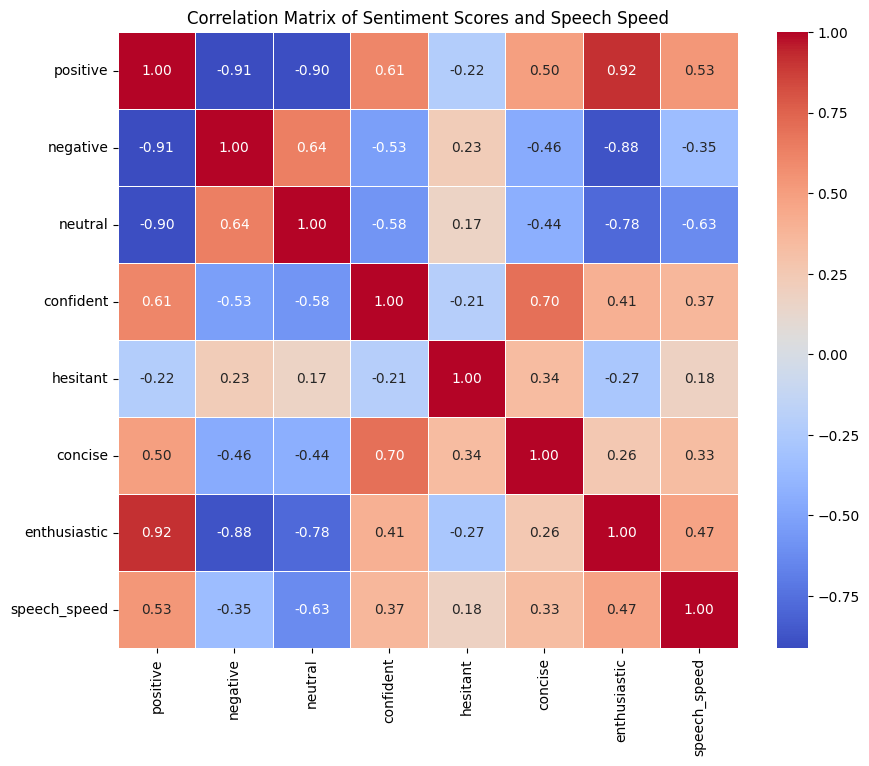

In [21]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

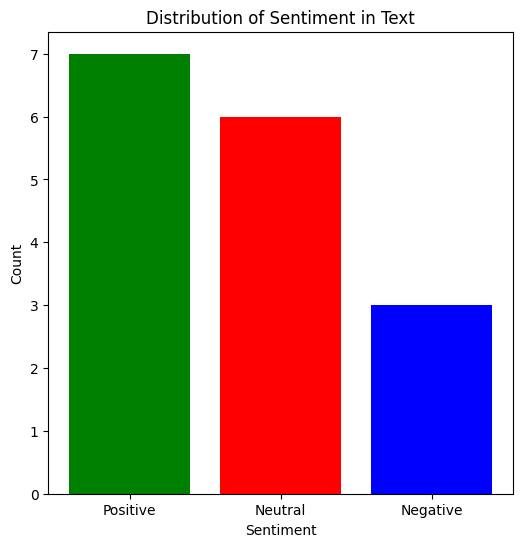

In [24]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [31]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])


                                                 text dominant_quality
0    Hi, hope you're doing well. I'm Srivats Biyan...         hesitant
1    Now before joining IIM Co-Ecode, what all hav...         hesitant
2    I've also cleared CFA level 1. I interned wit...        confident
3    article shift basically from there and I work...         hesitant
4    CA, I worked with ITC limited in the internal...         hesitant
5    which I joined IIM Co-Ecode for the MBA progr...         hesitant
6    am a very analytical person. I love playing w...        confident
7    sorts of statistical tools, try and understan...          neutral
8    are there from those numbers. I just love the...     enthusiastic
9    Education is something which I believe is the...        confident
10   crux of any economy of the whole, not only th...         negative
11   is educated, I think the whole problem, I thi...        confident
12   this is the reason I am very fascinated about...     enthusiastic
13   I

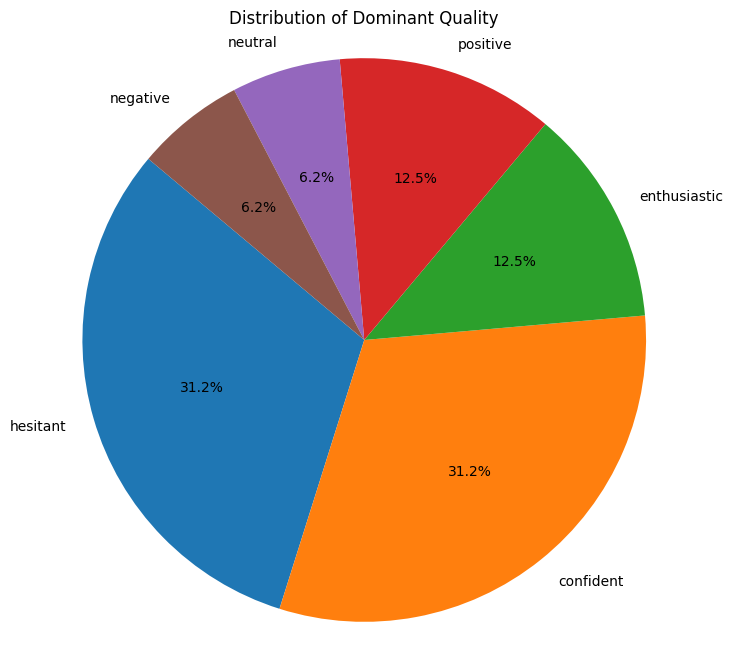

In [32]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Quality')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [22]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'neutral': 0.7849462365591398,
 'fear': 0.10752688172043011,
 'angry': 0.07526881720430108,
 'happy': 0.010752688172043012,
 'sad': 0.010752688172043012,
 'surprise': 0.010752688172043012}

In [23]:
emotion_percentage_dict['disgust']=0

In [24]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [25]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: 56.179720756675934


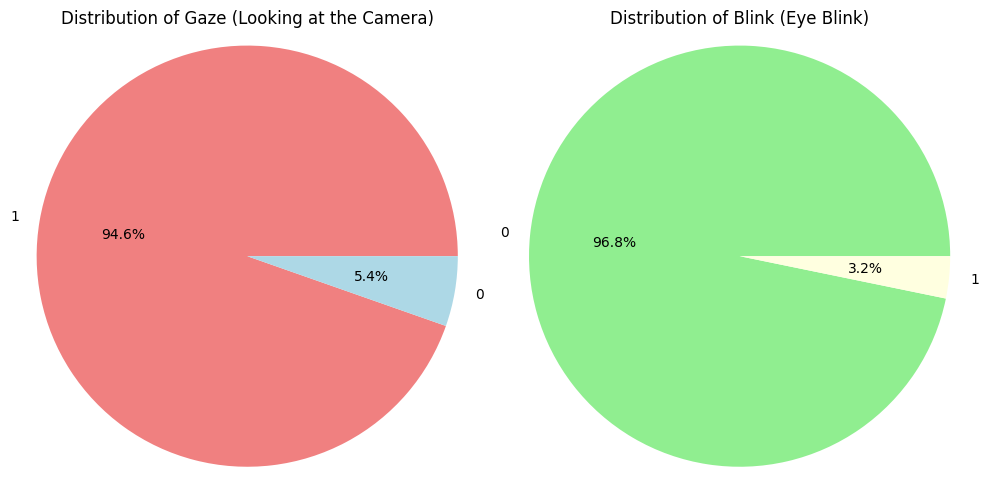

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [27]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [28]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [29]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.8452885603345281

In [33]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'hesitant': 0.3125,
 'confident': 0.3125,
 'enthusiastic': 0.125,
 'positive': 0.125,
 'neutral': 0.0625,
 'negative': 0.0625}

In [34]:
sentiment_percentage_dict['concise']=0

In [35]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [36]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.14578496947797248

In [37]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [38]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.7640307964999351


In [39]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

60.612435873620804